In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penguins/penguins_size.csv
/kaggle/input/penguins/penguins_lter.csv


# Project Purpose
In this unsupervised machine learning project, we leverage the penguins dataset to unravel the subtle distinctions between the three penguins species—Adelie, Chinstrap, and Gentoo. By deploying the KMeans clustering algorithm, we utilize the measures—'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', and 'body_mass_g'—to discern the natural clusters within the data. The model enables us to classify the species without prior labels, drawing on the inherent geometry of the data space shaped by these four dimensions. The goal is to let the k-means clustering algorithm try to determine the samples’ classes. 

The data source: www.kaggle.com


  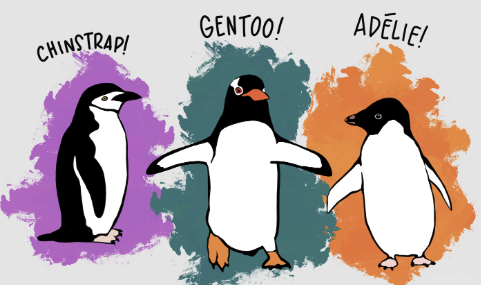

In [3]:
#reading dataset
penguins = pd.read_csv('/kaggle/input/penguins/penguins_size.csv')

# Data Exploration

In [4]:
penguins.shape

(344, 7)

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [21]:
# check for sign of any outliers
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,predicted_class_type
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886,0.895210
std,5.460521,1.967909,14.022175,804.836129,0.777561
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,48.575000,18.700000,213.000000,4793.750000,2.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [23]:
# check for duplicate
penguins.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
338    False
340    False
341    False
342    False
343    False
Length: 334, dtype: bool

In [6]:
from tabulate import tabulate
import pprint
print(tabulate(penguins.describe(), headers='keys', tablefmt='grid'))

+-------+--------------------+-------------------+---------------------+---------------+
|       |   culmen_length_mm |   culmen_depth_mm |   flipper_length_mm |   body_mass_g |
+=======+====================+===================+=====================+===============+
| count |          342       |         342       |            342      |       342     |
+-------+--------------------+-------------------+---------------------+---------------+
| mean  |           43.9219  |          17.1512  |            200.915  |      4201.75  |
+-------+--------------------+-------------------+---------------------+---------------+
| std   |            5.45958 |           1.97479 |             14.0617 |       801.955 |
+-------+--------------------+-------------------+---------------------+---------------+
| min   |           32.1     |          13.1     |            172      |      2700     |
+-------+--------------------+-------------------+---------------------+---------------+
| 25%   |           3

# Visualizing dataset with Seaborn 

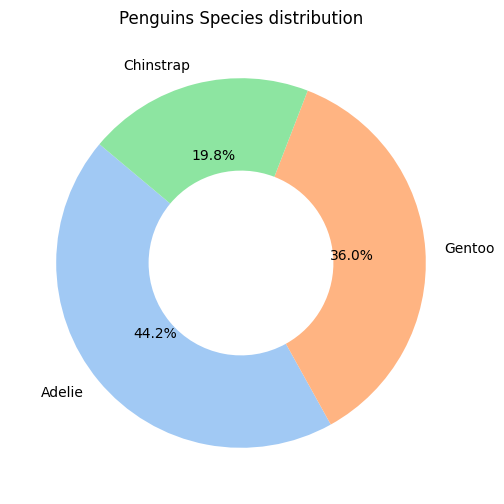

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample penguins DataFrame for demonstration (please replace with your actual DataFrame)
# penguins = ...

# Count the occurrences of each data type
dtype_counts = penguins.species.value_counts()

# Get a color palette
colors = sns.color_palette("pastel", len(dtype_counts))

# Create the donut chart
plt.figure(figsize=(8, 6))
plt.pie(dtype_counts, labels=dtype_counts.index, colors=colors, 
        wedgeprops=dict(width=0.5), startangle=140, autopct='%1.1f%%')

plt.title("Penguins Species distribution")
plt.show()

we can see that the penguins dataset has different number of samples for each species.

In [8]:
penguins['species'].describe()

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


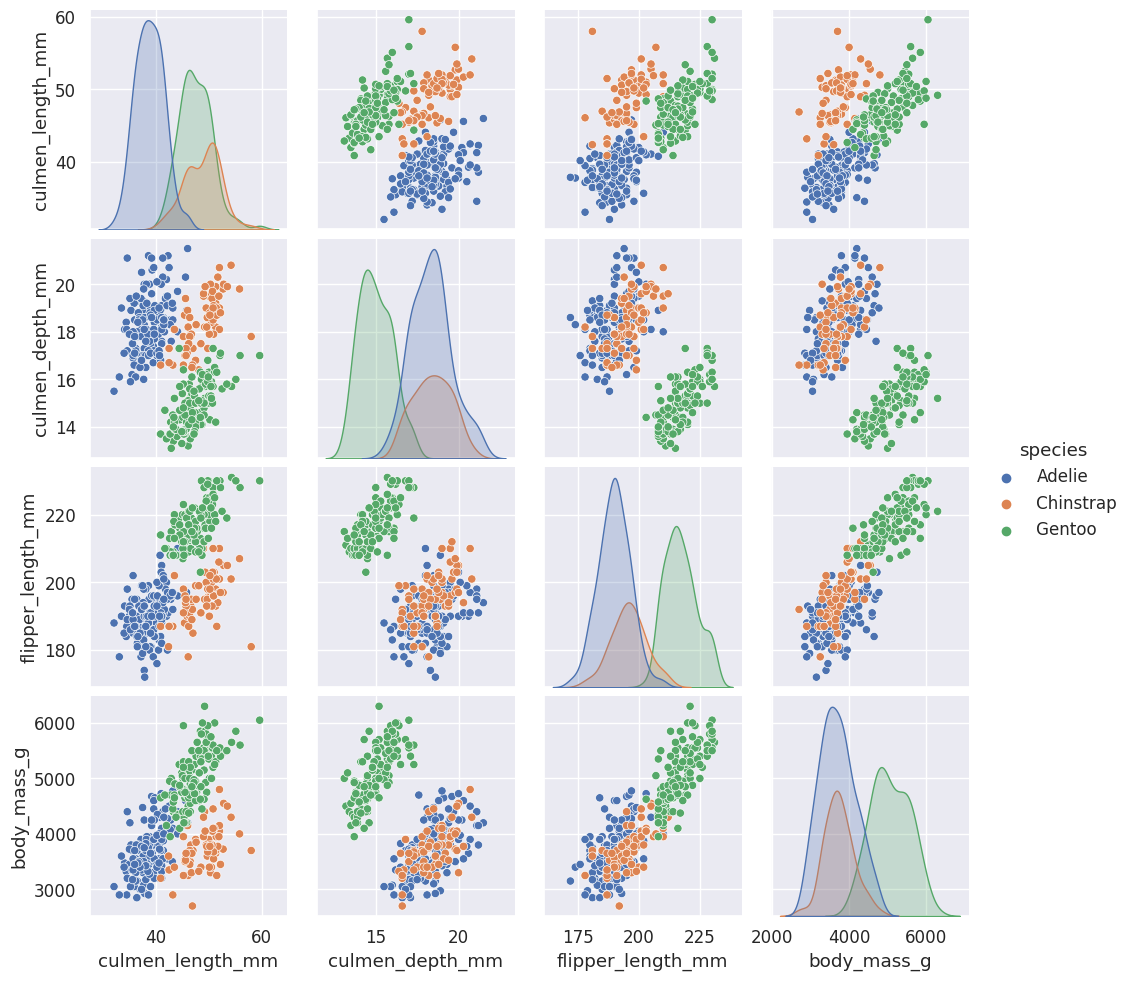

In [9]:
import seaborn as sns
# Load the dataset (for demonstration purposes, if you already have it loaded, skip this step)
#penguins = sns.load_dataset('penguins')
sns.set(font_scale=1.1)
sns.set_style('darkgrid')
# Use only numeric columns for pairplot
grid = sns.pairplot(data=penguins, vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue='species')
#grid = sns.pairplot(data=penguins, vars=penguins.columns[2:6], hue='species')
plt.show()
#sns.pairplot(data, hue = "species", height=3, diag_kind="hist")

In [10]:
# check the total of missing values
penguins.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
# drop missing values and unwanted columns
penguins = penguins.dropna().drop(columns=['island','sex'])

In [12]:
penguins.isnull().sum()

species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [13]:
# setting up target variable and featuers
penguins.columns

Index(['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [14]:
penguins['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the KMeans estimator
kmeans = KMeans(n_clusters=3, random_state=43)

# Fit the model to the standardized features
kmeans.fit(X_scaled)

# Predict the clusters (which we'll interpret as class types)
predicted_clusters = kmeans.predict(X_scaled)

# Add the predicted clusters back to the original dataframe
penguins['predicted_class_type'] = predicted_clusters

# Show the first few rows of the dataframe with the predicted class types
print(penguins.head())

  species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie              39.1             18.7              181.0       3750.0   
1  Adelie              39.5             17.4              186.0       3800.0   
2  Adelie              40.3             18.0              195.0       3250.0   
4  Adelie              36.7             19.3              193.0       3450.0   
5  Adelie              39.3             20.6              190.0       3650.0   

   predicted_class_type  
0                     1  
1                     1  
2                     1  
4                     1  
5                     1  


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder

# Assuming you have the true labels in 'species' column
true_labels = penguins['species'].values
predicted_labels = penguins['predicted_class_type'].values

# Encode the true labels to numeric
le = LabelEncoder()
true_labels_encoded = le.fit_transform(true_labels)

# Map the predicted clusters to the actual species labels
labels_map = np.zeros_like(predicted_labels)
for i in range(3):
    mask = (predicted_labels == i)
    # Using pandas to get the mode which can handle non-numeric data
    labels_map[mask] = pd.Series(true_labels_encoded[mask]).mode()[0]

# Now we can calculate the accuracy
accuracy = accuracy_score(true_labels_encoded, labels_map)
print(f'Accuracy: {accuracy}')

# For precision, we use the numeric equivalents
precision = precision_score(true_labels_encoded, labels_map, average='weighted')
print(f'Precision: {precision}')

Accuracy: 0.9191616766467066
Precision: 0.9303625307524487


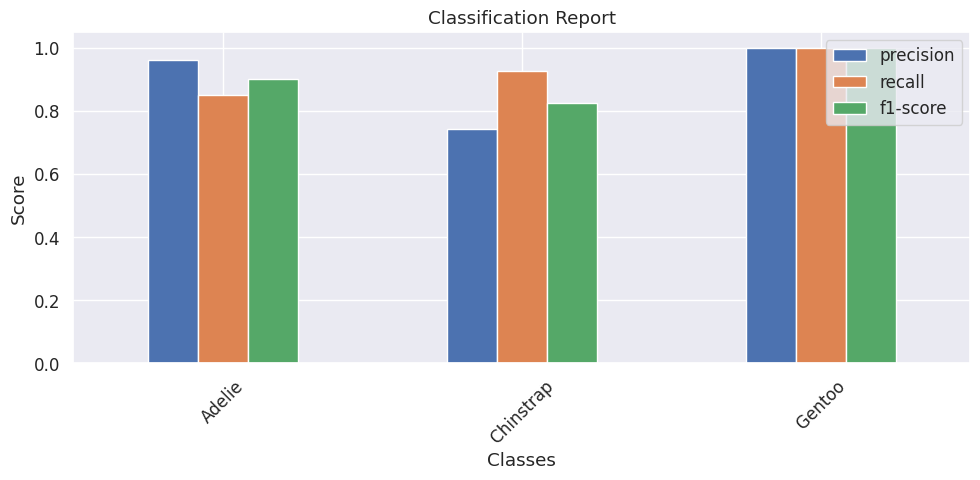

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encoding the true labels
le = LabelEncoder()
true_labels_encoded = le.fit_transform(true_labels)
# Output the classification report
report = classification_report(true_labels_encoded, labels_map, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
if 'accuracy' in report_df.index:
    report_df = report_df.drop('accuracy')
report_df = report_df.drop('support', axis=1)
# Remove the last row 
report_df = report_df[:-2]
# Graphing the bar chart
report_df.plot(kind='bar', figsize=(10, 5))
plt.title('Classification Report')
plt.ylabel('Score')
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

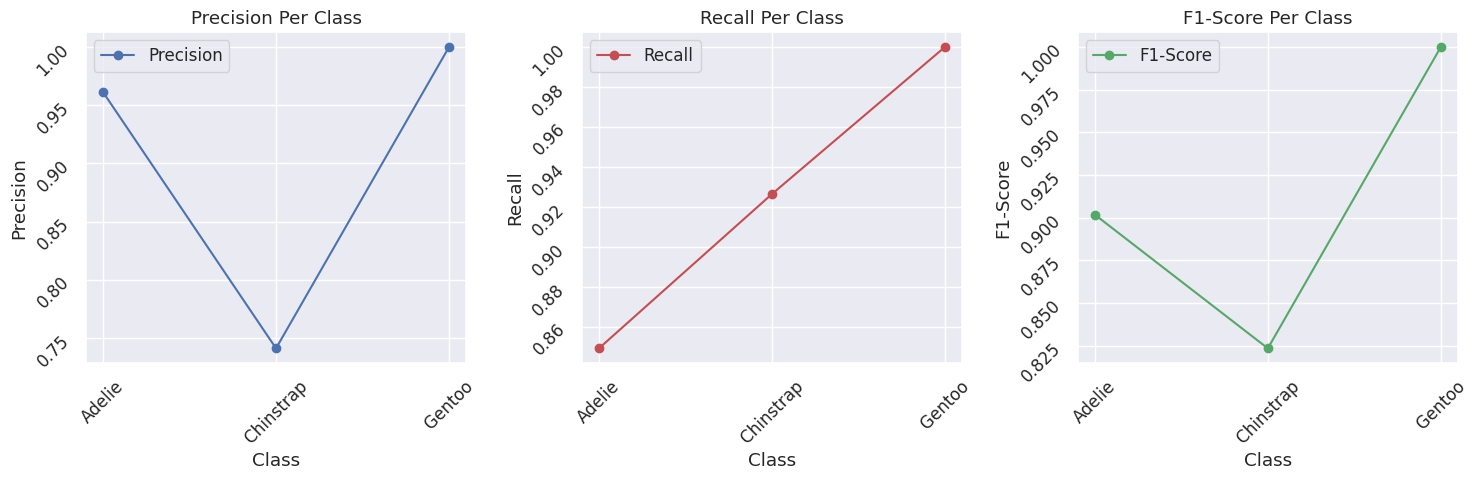

In [18]:
# Generate a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
# Precision Graph
axs[0].plot(report_df.index, report_df['precision'], marker='o', linestyle='-', color='b', label='Precision')
axs[0].set_title('Precision Per Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Precision')
axs[0].tick_params(labelrotation=45)
axs[0].legend()
# Recall Graph
axs[1].plot(report_df.index, report_df['recall'], marker='o', linestyle='-', color='r', label='Recall')
axs[1].set_title('Recall Per Class')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Recall')
axs[1].tick_params(labelrotation=45)
axs[1].legend()
# F1-Score Graph
axs[2].plot(report_df.index, report_df['f1-score'], marker='o', linestyle='-', color='g', label='F1-Score')
axs[2].set_title('F1-Score Per Class')
axs[2].set_xlabel('Class')
axs[2].set_ylabel('F1-Score')
axs[2].tick_params(labelrotation=45)
axs[2].legend()
plt.tight_layout()
plt.show()

# Hyperparameter
**Apply Adjusted Rand Index (ARI) to verify the quality of clusters created by the algorithm**

In [19]:
from sklearn.metrics import adjusted_rand_score

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels_encoded, labels_map)
print(f'Adjusted Rand Index: {ari}')

Adjusted Rand Index: 0.8006321672890778


# Conclusion
**The use of K-Means clustering with n_clusters=3 to the penguins dataset, focusing on features ('culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'), has yielded highly promising results for classifying penguin species. The model achieved an accuracy of 91.92% and a precision of 93.04%. Additionally, the Adjusted Rand Index (ARI), a more appropriate metric for evaluating the quality of clustering in unsupervised learning, was remarkably high at 0.8006**.